**Aprendizaje Automático** - 2024
# Clase 3: El problema del sobreajuste

Contenidos:
* Evaluación de modelos
* Generalización
* Split train-test
* Complejidad de modelos
* Balance sesgo/varianza
* Curva de complejidad
* Validación cruzada y búsqueda de hiperparámetros





# Evaluación de modelos y generalización

Referencia: Data Science from Scratch, 2nd Edition by Joel Grus https://www.oreilly.com/library/view/data-science-from/9781492041122/

## Modelos

¿Qué es un modelo? Un modelo es una **representación** generalmente simplificada de una **relación** matemática que existe entre diferentes variables.

Por ejemplo, si estás tratando de recaudar dinero para tu sitio de redes sociales, podrías construir un modelo de negocio (probablemente en una hoja de cálculo) que tome entradas como "número de usuarios", "ingresos por publicidad por usuario" y "número de empleados", y produzca tus ganancias anuales para los próximos años. Una receta de cocina implica un modelo que relaciona entradas como "número de comensales" y "hambre" con las cantidades de ingredientes necesarios.

**Aprendizaje automático (Machine Learning)**

El término aprendizaje automático refiere a la creación y uso de modelos que se **aprenden a partir de datos**.

Como vimos en la clase teórica, se utilizan datos conocidos para desarrollar modelos que se pueden usar para hacer predecciones en datos nuevos, como:

• Si un mensaje de correo electrónico es spam o no

• Si una transacción con tarjeta de crédito es fraudulenta

• En qué anuncio publicitario es más probable que un comprador haga clic

El modelo, también llamado **hipótesis**, se obtiene de **estimar** los **parámetros** que mejor aproximan a la **función objetivo** en un conjunto de **datos**. Esta estimación se obtiene proponiendo una forma general de modelo que define un **espacio de hipótesis** en el que se encuentran todas las **hipótesis** que tienen esa forma general pero con diferentes valores de parámetros. Se hace una exploración de ese **espacio de hipótesis** que me permite encontrar los **parámetros** que mejor **ajustan** a los datos. A esta exploración se la llama **entrenamiento del modelo**, y suele verse como un problema de **optimización** en el que se busca encontrar aquellos **parámetros** que reducen el **error** que comete el **modelo** en predecir los patrones presentes en los **datos** en los que fue entrenado.


## Entrenamiento del modelo a partir de ajustar datos

En esta parte vamos a ver cómo **entrenar** un modelo con un ejemplo sencillo. Se trata de **ajustar un modelo** de regresión simple en un conjunto de datos, utilizando funciones de Numpy (la idea de esta sección es tomar el concepto, no se preocupen si no siguen el código).

Para ello, vamos a generar artificialmente un conjunto de datos a partir de plantear una relación (cuadrática) conocida entre variables, pero agregando ruido para que los datos generados sean un poco más realistas. Es un caso particular en el conocemos la **función objetivo**, lo cual no es usual en la práctica. En aplicaciones reales, uno tiene datos que son una submuestra de la fenomenología asociada a un proceso y reflejan una relación entre variables pero que es **desconocida**.


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Generar datos de muestra
np.random.seed(0)
cantidad_puntos = 20
x = np.linspace(-2, 2, cantidad_puntos)
y = x**2 + np.random.randn(cantidad_puntos)*0.4

Entonces, al **ajustar el modelo**, lo que hacemos es encontrar la **relación** entre variables que mejor describe los **datos** que tenemos.

En este ejemplo, vamos a proponer como hipótesis un polinomio de algún grado. El espacio de hipótesis serán todos los polinomios posibles de ese grado que se pueden construir con los distintos valores de coeficientes del polinomio. Realizando un ajuste a los datos con funciones de Numpy, vamos a estimar los coeficientes del polinomio (parámetros) que mejor ajustan a los datos para esa relación polinómica propuesta.

En este ejemplo, vamos a hacer este ajuste para tres propuestas de hipótesis distintas, con el objetivo de entrenar tres modelos distintos y evaluar qué tan buenos son en el ajuste de los datos. Los tres modelos propuestos son polinomios, pero de diferente grado: uno de grado 1, otro de grado 3 y otro de grado 20.


In [14]:
# Ajuste de un polinomio de grado 1 (subajuste)
p1 = np.polyfit(x, y, 1)
f1 = np.poly1d(p1)

# Ajuste de un polinomio de grado 3 (ajuste adecuado)
p3 = np.polyfit(x, y, 3)
f3 = np.poly1d(p3)

# Ajuste de un polinomio de grado 20 (sobreajuste)
p20 = np.polyfit(x, y, 20)
f20 = np.poly1d(p20)

<ipython-input-14-e85547fdac31>:10: RankWarning: Polyfit may be poorly conditioned
  p20 = np.polyfit(x, y, 20)


In [15]:
p20


array([ 2.03931021e-01,  1.22930920e+00, -1.98523347e+00, -1.89417244e+01,
        3.61258232e+00,  1.20955664e+02,  2.56494879e+01, -4.16090038e+02,
       -1.45359140e+02,  8.38399326e+02,  3.13783997e+02, -1.00572327e+03,
       -3.43997023e+02,  6.95351910e+02,  1.96474085e+02, -2.52111133e+02,
       -5.46443014e+01,  3.80404881e+01,  7.00699099e+00, -8.97933907e-01,
        5.08156993e-02])

Por último, graficamos los datos de muestra junto con los tres ajustes polinómicos y observamos el efecto de sobreajuste y subajuste.

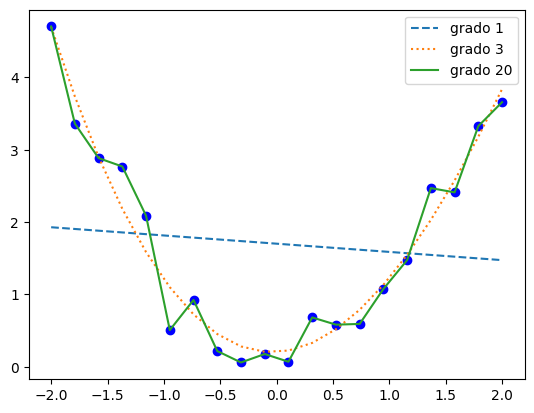

In [16]:
# Graficar los datos de muestra y los ajustes polinómicos
plt.scatter(x, y, color='blue')
plt.plot(x, f1(x), label='grado 1',linestyle='--')
plt.plot(x, f3(x), label='grado 3',linestyle=':')
plt.plot(x, f20(x), label='grado 20')
plt.legend(loc='best')
plt.show()

Podemos ver que el polinomio de grado 1 (línea azul) no describe bien los datos de entrenamiento. El mejor ajuste parece ser el polinomio de grado 20 (línea verde), que pasa exactamente por cada punto de datos (cuando la cantidad de puntos también es 20) de entrenamiento, pero si eligiéramos unos pocos puntos más, es muy probable que se desvíe bastante de ellos. Y el polinomio de grado 3 (línea naranja) alcanza un buen equilibrio; está bastante cerca de cada punto, y si estos datos son representativos, es probable que la línea también esté cerca de nuevos puntos de datos.

Del ejemplo previo, se puede observar que los modelos demasiado complejos llevan a lo que se llama **sobreajuste**, se ajustan demasiado a los datos en los que fueron entrenados. Al ajustarse tanto, el modelo está muy influenciado por el ruido del conjunto de datos específico que usamos. Es como si los memorizara. De esta manera, sería esperable que el modelo obtenido no sea tan bueno para predecir datos nuevos, que tienen otra componente de ruido particular. A esta tarea de predecir en datos nuevos se lo llama **generalizar** y es lo que queremos que pase con **modelos predictivos** debido a que el aprendizaje es **inductivo**. Entonces, que el modelo sobreajuste es un problema porque significa que no va a **generalizar** bien para obtener buenas predicciones en datos nuevos, más allá de los datos en los que se entrenó. Esto es efectivamente lo que pasa en este caso, como vamos a ver más adelante.

## Tradeoff entre sesgo y varianza

El tradeoff entre sesgo y varianza es un concepto fundamental en el aprendizaje automático. El sesgo se refiere a la diferencia entre el valor predicho de un modelo y el valor real, mientras que la varianza se refiere a la variabilidad del valor del modelo para diferentes conjuntos de datos. En general, los modelos con alto sesgo tienen una tendencia a subestimar o sobreestimar los valores, mientras que los modelos con alta varianza son muy sensibles a las variaciones en los datos de entrenamiento y tienen una tendencia a sobreajustar los datos de entrenamiento.

En el contexto del tradeoff entre sesgo y varianza, lo que se busca es encontrar un equilibrio óptimo entre estos dos factores. Un modelo con bajo sesgo y baja varianza generalmente se considera un modelo ideal, pero a menudo es difícil lograr este equilibrio óptimo en la práctica. Por lo tanto, es importante encontrar el equilibrio adecuado que se ajuste a las necesidades específicas de la aplicación en cuestión, ya que un modelo con alto sesgo y baja varianza puede ser preferible en algunas aplicaciones, mientras que un modelo con bajo sesgo y alta varianza puede ser preferible en otras.

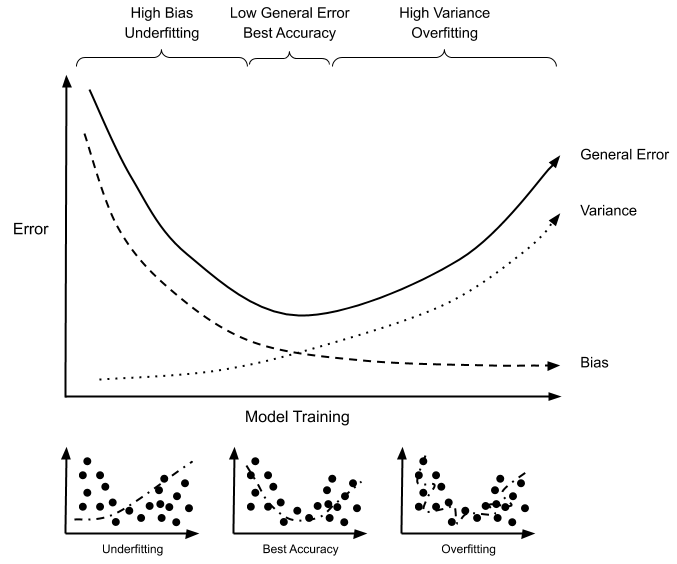


### Ejercicio 1

A partir de los datos determinemos la curva del error vs complejidad del modelo (grado del polinomio) como en la figura de arriba.

Para eso necesitamos saber que tanto se equivoca este modelo y que en regresión llamamos el **residuo** del ajuste polinómico, esto es la diferencia absoluta entre nuestra predicción y el valor verdadero ($y_i$) del dato _i-ésimo_, en cuentas cada residuo es $r_i = | y_i - \hat{y_i}|$. Vamos a usar la función `polyfit` que dado un conjunto de datos nos devuelve el polinomio del grado determinado que mejor aproxima a nuestros datos.


```
Returns:
p : ndarray, shape (M,) or (M, K)
    Polynomial coefficients, highest power first.
    If `y` was 2-D, the coefficients for `k`-th data set are in ``p[:,k]``.

residuals, rank, singular_values, rcond : present only if `full` = True
    Residuals of the least-squares fit, the effective rank of the scaled
    Vandermonde coefficient matrix, its singular values, and the specified
    value of `rcond`. For more details, see `linalg.lstsq`.
```

Entonces, determinen los residuos vs el grado del polinomio utlizando la siguiente estructura.

```
 p, res, _, _, _ = numpy.polyfit(x, y, deg, full=True)
```

Calcule los residuos para polinomios entre grado 1 y 20.

In [17]:
len(x)

20

In [18]:
# COMPLETAR
residuos=[]
for grado in range(1,18):
  p, res, _, _, _ = np.polyfit(x, y, grado, full=True)
  residuos.append(res)

In [19]:
residuos

[array([37.56256187]),
 array([1.92232782]),
 array([1.70720782]),
 array([1.56584731]),
 array([1.55823808]),
 array([1.55808908]),
 array([1.28397097]),
 array([1.01539766]),
 array([1.00133651]),
 array([0.99963307]),
 array([0.97652357]),
 array([0.57808244]),
 array([0.56183969]),
 array([0.54846811]),
 array([0.44131615]),
 array([0.41596553]),
 array([0.08999857])]


Grafiquen la curva de complejidad para este problema, es decir los residuos vs el grado del polinomio

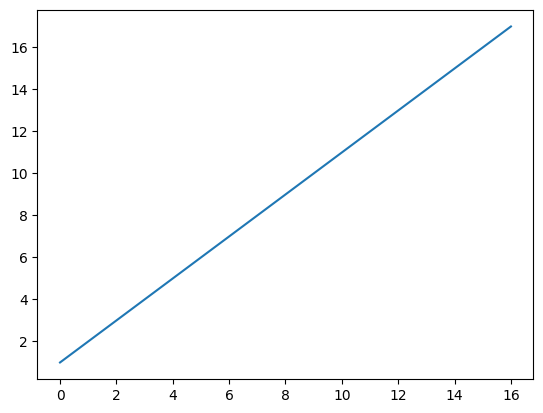

In [20]:
# COMPLETAR
x = np.arange(1,18,1)

plt.plot(x)


Entonces, **¿cómo aseguramos que nuestros modelos no sean demasiado complejos?**

El enfoque más fundamental implica el uso de diferentes datos para entrenar y probar el modelo. La forma más sencilla de hacerlo es **dividir el conjunto de datos**, de manera que, por ejemplo, dos tercios se usen para entrenar el modelo, después de lo cual medimos el rendimiento del modelo en el tercio restante: **separación de los datos entre train y test**. De esta manera, podremos evaluar la performance del modelo en datos que no fueron usados para el entrenamiento, si no que se están guardando para el **testeo independiente**.

# Separación de datos

Por lo que vimos, antes de ajustar un modelo a los datos, debemos separarlos en conjuntos de entrenamiento y prueba. Podemos hacer esto fácilmente utilizando la función train_test_split de sklearn. Sin embargo, para este ejemplo, haremos la separación manualmente.

In [21]:
# Generamos 100 datos
np.random.seed(0)
cantidad_puntos = 100
X = np.linspace(-2, 2, cantidad_puntos)
y = X**2 + np.random.randn(cantidad_puntos)*0.4

## Ejercicio 2

Generar manualmente una separación de datos aleatoria del 80% para train y un 20% para test. Usen solo funciones de Numpy. Esto lo tenemos que hacer tanto para el atributo/variable independiente `X` como para la respuesta target/variable dependiente `y`.

In [22]:
len(X)

100

In [23]:
# COMPLETAR
np.random.seed(42) # para reproducibilidad

import numpy as np

def get_train_test_inds(data_length, train_proportion=0.8):
    '''Genera índices para dividir un conjunto de datos en proporciones de entrenamiento y prueba.'''
    indices = np.arange(data_length)
    np.random.shuffle(indices)
    n_train = int(train_proportion * data_length)

    train_inds = indices[:n_train]
    test_inds = indices[n_train:]

    return train_inds, test_inds

# Supongamos que ya tienes X e y con 100 datos cada uno
data_length = len(X)  # Se asume que len(X) == len(y) == 100

# Obtiene los índices para la división 80/20
train_inds, test_inds = get_train_test_inds(data_length, train_proportion=0.8)

# Aplica los índices para dividir X y y
X_train = X[train_inds]
y_train = y[train_inds]
X_test = X[test_inds]
y_test = y[test_inds]



print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")
print(f"y_train: {len(y_train)}")
print(f"y_test: {len(y_test)}")

X_train: 80
X_test: 20
y_train: 80
y_test: 20


Visualicemos como quedaron distribuidos los datos según el split:

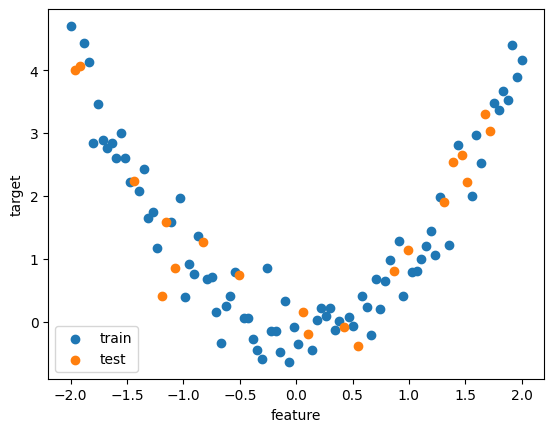

In [24]:
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.show()

## Ajustando y evaluando un modelo

Ahora que hemos cargado los datos y los hemos separado en conjuntos de entrenamiento y prueba, podemos ajustar un modelo de regresión utilizando las funciones previamente vistas. Vamos a ver a modo ilustrativo un modelo lineal simple:

In [25]:
grado = 2
parametros = np.polyfit(X_train, y_train, grado)
y_train_pred = np.polyval(parametros, X_train)

In [26]:
parametros

array([ 1.13426555, -0.05513027, -0.16975638])

Podemos usar estos parámetros para graficar la recta ajustada:

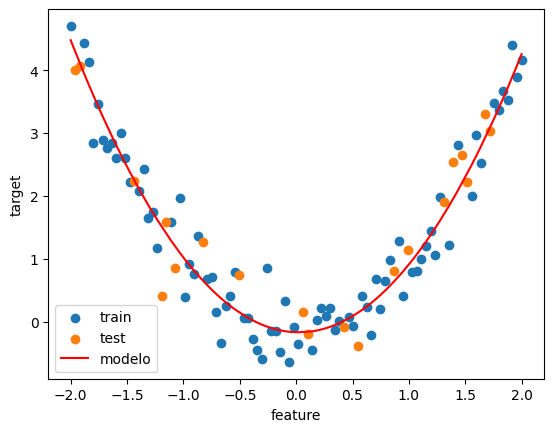

In [27]:
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
sorted_idx = np.argsort(X_train)
plt.plot(X_train[sorted_idx], y_train_pred[sorted_idx], color='red', label='modelo')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.show()

### Ejercicio 3

Calcular el RMSE/MSE (root mean square error) o error cuadrático medio para el modelo recién ajustado en el conjunto de entrenamiento y para el conjunto de testeo.

In [28]:
from numpy import sqrt, mean, square

def calcular_rmse(y_true, y_pred):
    return sqrt(mean(square(y_true - y_pred)))

# Calcular RMSE para el conjunto de entrenamiento
rmse_train = calcular_rmse(y_train, y_train_pred)

# Calcular RMSE para el conjunto de testeo
y_test_pred = np.polyval(parametros, X_test)
rmse_test = calcular_rmse(y_test, y_test_pred)

print(f"RMSE en conjunto de entrenamiento: {rmse_train}")
print(f"RMSE en conjunto de testeo: {rmse_test}")

RMSE en conjunto de entrenamiento: 0.3596014590804593
RMSE en conjunto de testeo: 0.41288718087666926


## Validación

Formalmente, cuando uno separa datos en entrenamiento y testeo, el set de testeo tiene que considerarse como un conjunto de datos independiente, que no debe evaluarse hasta no tener el modelo final, con todas las decisiones necesarias para llegar a ese modelo final ya tomadas. Esto implica que no se debería modificar el modelo una vez evaluada la performance en el testeo, ya que de otra manera, estoy usando información de los datos de testeo para tomar decisiones del entrenamiento del modelo, lo que es una forma de "data leakage" (que se filtren datos del testeo en el entrenamiento), y por lo tanto el rendimiento medido no será confiable.

El objetivo del aprendizaje automático es construir modelos que puedan generalizar a datos nuevos que no han sido vistos previamente. Si se evalúa el modelo solo en el conjunto de entrenamiento, el modelo podría sobreajustar (ajustar demasiado a los datos de entrenamiento) y no ser capaz de generalizar bien a datos nuevos.

Con la **validación**, se puede evaluar el rendimiento del modelo en datos que no se utilizaron para entrenar el modelo, lo que permite estimar el rendimiento del modelo en datos nuevos, pero sin tocar los datos de testeo. Además, la validación permite comparar diferentes modelos y seleccionar el mejor modelo en función de su capacidad de generalización, antes de realizar predicciones en un grupo de testeo realmente independiente.

Entonces, en términos prácticos, los datos suelen separarse en más grupos. Primero se separa un grupo de testeo independiente que no será tocado hasta tener la versión final del modelo. Lo restante será considerado como **set de desarrollo**, en el que se definirá todo lo necesario para llegar al modelo final y donde se entrenará en última instancia ese modelo final. El set de desarrollo por lo tanto estará formado por datos de **entrenamiento** y de **validación**. Este proceso de separación de datos permitirá tener una mejor estimación de cuán bueno es mi modelo y modificarlo de manera tal de reducir el sobreajuste cuando sea necesario.





![image.png](https://cdn.shortpixel.ai/spai/q_lossy+w_730+to_webp+ret_img/https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png)

En resumen, la **validación** sirve para elegir el mejor modelo obtenido de los datos de **entrenamiento**, con capacidades potenciales de **generalización**, el cual será utilizado posteriormente para reportar los resultados finales en el conjunto de **testeo independiente**.

---
# Búsqueda de hiperparámetros y validación cruzada

## Definición de hiperparámetros

Antes de continuar, es importante definir qué son los **hiperparámetros** del modelo y cómo difieren de los **parámetros** (aprendibles). Los *hiperparámetros son aquellos que no se aprenden a partir de los datos, sino que se fijan antes de ajustar el modelo*. En contraste, los parámetros aprendibles son aquellos que se ajustan a partir de los datos durante el proceso de entrenamiento del modelo.


## Tipos de búsqueda y de validación cruzada


Muchas veces hacer una separación en tres conjuntos de datos (entrenamiento, validación y testeo) puede no ser suficiente cuando tenemos pocos datos. Para crear buenos modelos, queremos utilizar la mayor cantidad posible de datos para el entrenamiento disponibles. Sin embargo, si el conjunto de validación es pequeño, proporcionará una estimación relativamente ruidosa del rendimiento predictivo. Una solución a este dilema es la **validación cruzada**.

La **validación cruzada** o **K-fold cross-validation** es necesaria porque permite hacer distintos entrenamientos y validaciones de manera tal de obtener una estadística de la performance del modelo cuando es entrenado y evaluado en distintos subconjuntos de datos (que no son del todo independientes entre sí, pero algo es algo). De esta manera, me permite obtener una mejor estimación de cuán bueno puede ser mi modelo en la generalización, antes de definir usarlo como modelo final para realizar predicciones en el grupo de testeo independiente.



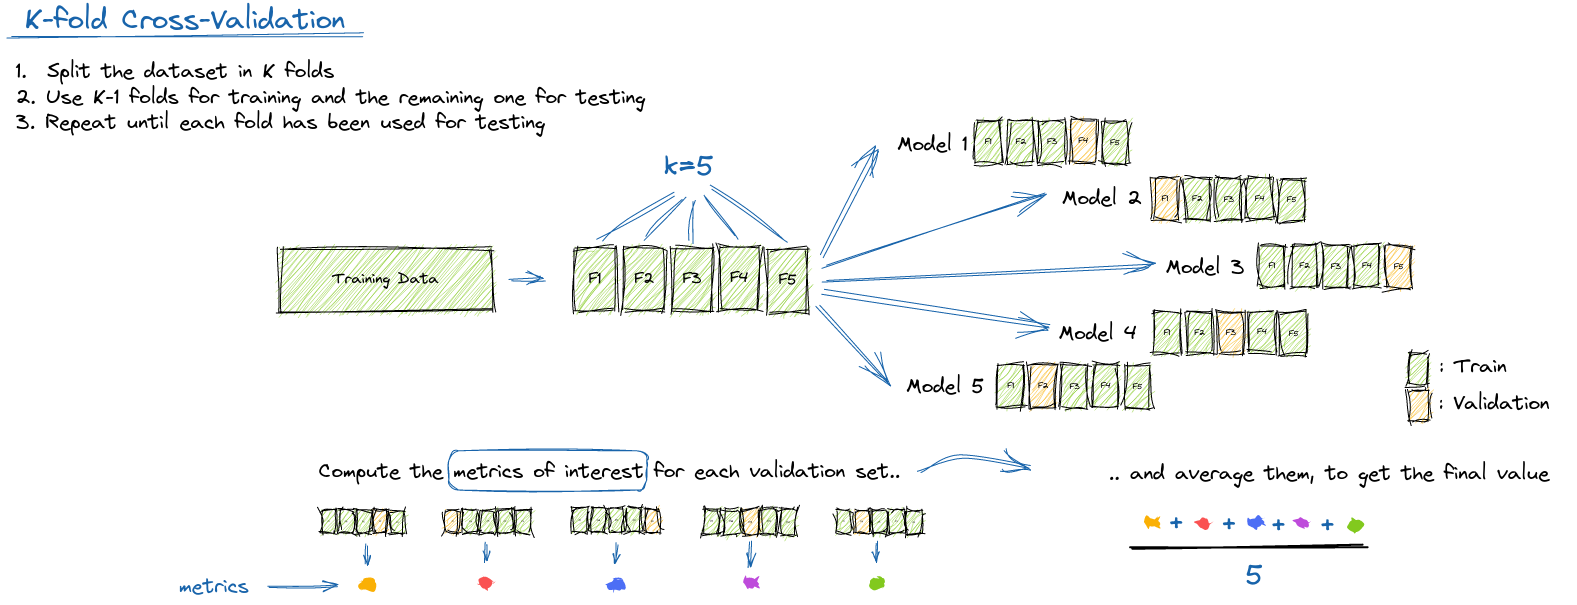

En general el esquema que vamos a utilizar es una combinacion de `train_test_split` para generar un conjunto `held-out` o test que **no utilizaremos hasta el final del pipeline del desarrollo** del modelo y lo combinaremos con validación cruzada para generar estimaciones confiables del error para cada posible hiperparámetro.

![image.png](https://scikit-learn.org/stable/_images/grid_search_workflow.png)

*Fuente: scikit-learn.org*

Dentro del conjunto de desarrollo podremos hacer un **K-fold CV** clásico u otro paradigma como por ejemplo [**Leave-One-Out CV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut) o [**Grouped CV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html). Incluso a veces será necesario [estratificar](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) en problemas de clasificación para mantener clases balanceadas.

![image.png](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

*Fuente: scikit-learn.org*

Y a la vez ahi adentro podremos hacer una búsqueda extensiva de hiperparámetros: **GridSearch** o realizar una búsuqueda aleatorizada en la cual podemos muestrearlos de una distribución: **RandomSearch**. Más adelante en el curso veremos detalles de como realizar todo esto con scikit-learn y ejemplos.

### Ejemplo

Veamos un ejemplo de validación cruzada con 5-folds para el problema de regresión lineal de los datos previamente utilizados.

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

def cross_validation(X, y, hiperparametro_grado_polinomio=1):
    # Definir número de folds
    n_folds = 5
    kf = KFold(n_splits=n_folds)

    # Listas para almacenar resultados
    train_scores_mse = []
    val_scores_mse = []

    # Loop de validación cruzada
    for i, (train_index, val_index) in enumerate(kf.split(X)):
        # Dividir datos en train y test
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # print(f"----- Fold {i} -----")
        # print("Tamaños:")
        # print(f"X_train: {X_train.shape}")
        # print(f"y_train: {y_train.shape}")
        # print(f"y_val: {y_val.shape}")

        # Entrenar modelo de regresión lineal
        parametros = np.polyfit(X_train, y_train, hiperparametro_grado_polinomio)

        # Predecir en train y test
        y_train_pred = np.polyval(parametros, X_train)
        y_val_pred = np.polyval(parametros, X_val)

        # Errores
        train_mse = np.mean((y_train_pred - y_train)**2)
        val_mse = np.mean((y_val_pred - y_val)**2)

        # Almacenar resultados
        train_scores_mse.append(train_mse)
        val_scores_mse.append(val_mse)

    # print("----- ----- -----")

    # Ordenemos todo en un dataframe
    resultados = pd.DataFrame({
        'fold': range(1, n_folds + 1),
        'train_mse': train_scores_mse,
        'val_mse': val_scores_mse,
    })

    return resultados, parametros

In [43]:
resultados, parametros = cross_validation(X,y,hiperparametro_grado_polinomio=1)

In [40]:
resultados

,fold,train_mse,val_mse
0,1,0.146174,0.098981
1,2,0.110730,0.243127
2,3,0.139343,0.125442
3,4,0.148452,0.091389
4,5,0.136295,0.150492


Hagamos un lindo gráfico!

<Axes: xlabel='fold', ylabel='MSE'>

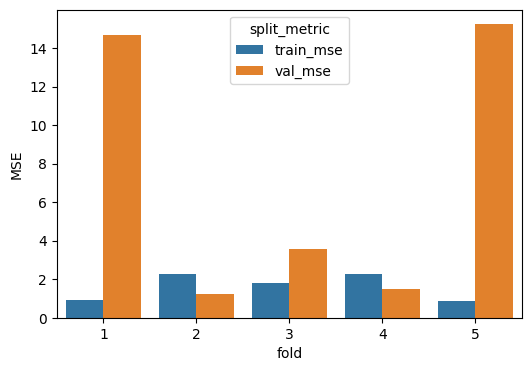

In [44]:
# Graficar resultados
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

results_melt = resultados.melt(id_vars=['fold'], var_name='split_metric', value_name='value')

axs.set_ylabel('MSE')
sns.barplot(x='fold', y='value', hue='split_metric',
            data=results_melt[results_melt['split_metric'].isin(['train_mse', 'val_mse'])], ax=axs)


¿Por qué creen que en el fold 1 y 5 les da tan distinto entre entrenamiento y validación?

**Rta**: Simplemente por que estoy usando un modelo lineal que corta los puntos al medio. Si utilizo un polinomio de grado 2 entonces el error el MSE se asemeja entre folds


In [47]:
resultados2, parametros = cross_validation(X,y,hiperparametro_grado_polinomio=2)

<Axes: xlabel='fold', ylabel='MSE'>

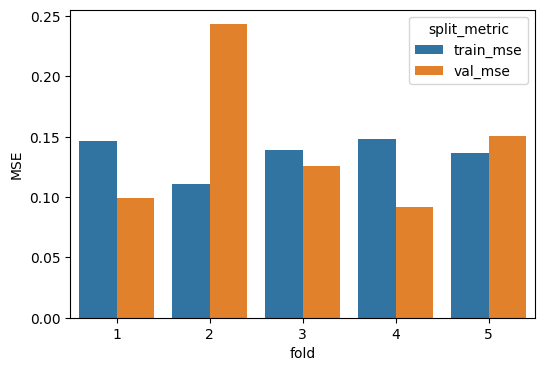

In [48]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

results_melt = resultados2.melt(id_vars=['fold'], var_name='split_metric', value_name='value')

axs.set_ylabel('MSE')
sns.barplot(x='fold', y='value', hue='split_metric',
            data=results_melt[results_melt['split_metric'].isin(['train_mse', 'val_mse'])], ax=axs)

### Ejercicio 4

Utilizar la función `cross_validation` para elegir el mejor hiperparámetro  `hiperparametro_grado_polinomio` utilizando valores entre 1 y 20. Grafique la curva de complejidad correspondiente, usando el promedio del error de validación. Agreguen de alguna manera que consideren, la variabilidad entre las predicciones en los folds para cada orden de polinomio. *Sugerencia: usen en el eje y una escala logarítmica.*

In [49]:
error_prom = []
variabilidad = []
error_prom_train= []
variabilidad_train = []
for grado in range(1,21,1):
  resultados, parametros = cross_validation(X,y,hiperparametro_grado_polinomio=grado)
  mean_resultados = mean(resultados['val_mse'])
  desvio_resultados = np.var(resultados['val_mse'])
  error_prom.append(mean_resultados)
  variabilidad.append(desvio_resultados)

  mean_resultados_train = mean(resultados['train_mse'])
  desvio_resultados_train = np.var(resultados['train_mse'])
  error_prom_train.append(mean_resultados_train)
  variabilidad_train.append(desvio_resultados_train)

In [50]:
complejidad = np.arange(1,21,1)

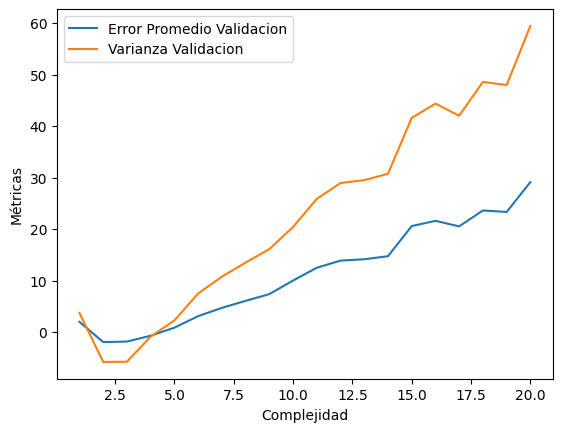

In [51]:
plt.plot(complejidad,np.log(error_prom), label='Error Promedio Validacion')
plt.plot(complejidad,np.log(variabilidad), label='Varianza Validacion')
plt.xlabel('Complejidad')
plt.ylabel('Métricas')
plt.legend()
plt.show()

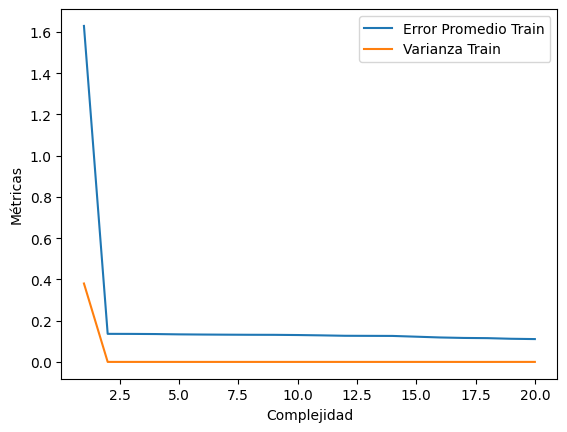

In [52]:
plt.plot(complejidad,error_prom_train, label='Error Promedio Train')
plt.plot(complejidad, variabilidad_train, label='Varianza Train')
plt.xlabel('Complejidad')
plt.ylabel('Métricas')
plt.legend()
plt.show()